In [37]:
import warnings
import pandas as pd  

# Filter FutureWarning and set it to "ignore"
warnings.filterwarnings('ignore', category=FutureWarning)

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [2]:
from sqlalchemy import create_engine, MetaData, Table

# Create a database engine
db_engine = create_engine('sqlite:////app/data/mydatabase.db')

# Create a database metadata object
metadata = MetaData()

# Bind database engines and metadata
metadata.reflect(bind=db_engine)

# Fetch the tables in the database
for table in metadata.tables.values():
    print("Table Name:", table.name)
    print("Table Columns:", table.columns.keys())


Table Name: loan_data
Table Columns: ['addr_state', 'annual_inc', 'application_type', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'purpose', 'term', 'verification_status']


In [3]:
from sqlalchemy import create_engine
import pandas as pd
# Reading data from a database
df = pd.read_sql_table('loan_data', db_engine)

# Displaying the first few rows of the dataframe
print(df.head())

  addr_state  annual_inc application_type emp_length  \
0         OK     50000.0       Individual    8 years   
1         FL    196000.0       Individual    2 years   
2         AL     65000.0       Individual  10+ years   
3         WA     52000.0       Individual    9 years   
4         FL     52000.0       Individual  10+ years   

                    emp_title  fico_range_high  fico_range_low grade  \
0             General Manager              669             665     D   
1                IT Director               704             700     B   
2          Asphalt Supervisor              669             665     D   
3            Scale Technician              764             760     A   
4  Independent Business Owner              674             670     D   

  home_ownership  installment  int_rate   issue_d  loan_amnt loan_status  \
0           RENT       186.82     20.39  2018/3/1     5000.0     Current   
1            OWN       483.45      9.92  2018/3/1    15000.0     Current   
2 

In [5]:
# Assign the dataframe to loan_data
loan_data = df

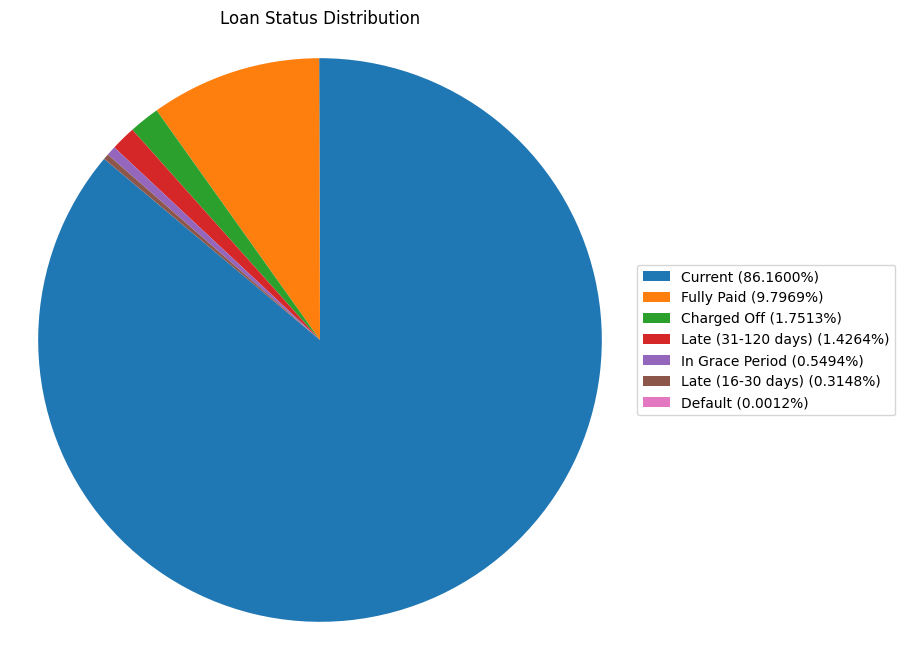

In [4]:
# Analysis of the loan status
import pandas as pd
import matplotlib.pyplot as plt

status_counts = loan_data['loan_status'].value_counts(normalize=True) * 100  # Calculate percentages

labels = status_counts.index
percentages = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(percentages, startangle=140)
plt.axis('equal') 
plt.title('Loan Status Distribution')

# Create legend with labels and percentages
legend_labels = [f'{label} ({percentages[i]:.4f}%)' for i, label in enumerate(labels)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

According to the Loan Status Distribution plot, it can be seen that the Current status accounts for the most, and the Fully Paid status is much higher compared to the Default status, reaching about 9.8%, which shows that the repayment of those who have obtained loans is still relatively optimistic.

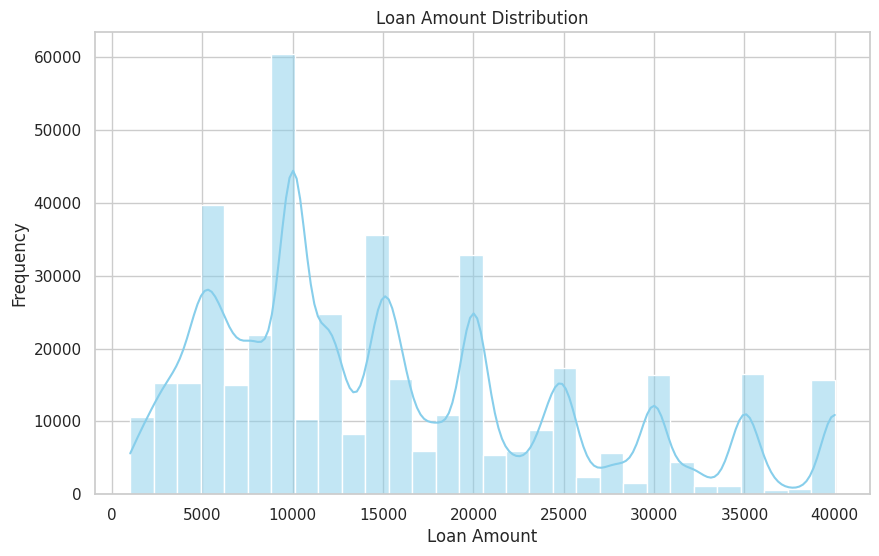

In [5]:
# Analysis of the distribution of loan amounts
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

It can be seen that the loan amounts are concentrated between 5,000 and 20,000, with a maximum ofIt can be seen that the percentage of loans with a term of 36 months reaches more than 70%, so the majority of the loans are 3 years. 40,000. Also, most of the loans are in multiples of 5,000. The highest number of loans were made in the amount of 10,000 dollars.

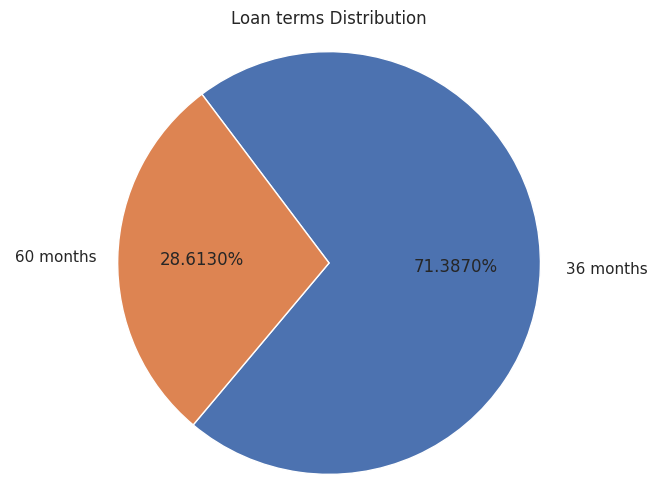

In [6]:
# Analysis of the distribution of loan terms 

import pandas as pd
import matplotlib.pyplot as plt

term_counts = loan_data['term'].value_counts()

labels = term_counts.index
sizes = term_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=230)
plt.axis('equal') 
plt.title('Loan terms Distribution')
plt.show()

It can be seen that the percentage of loans with a term of 36 months reaches more than 70%, so the majority of the loans are 3 years.

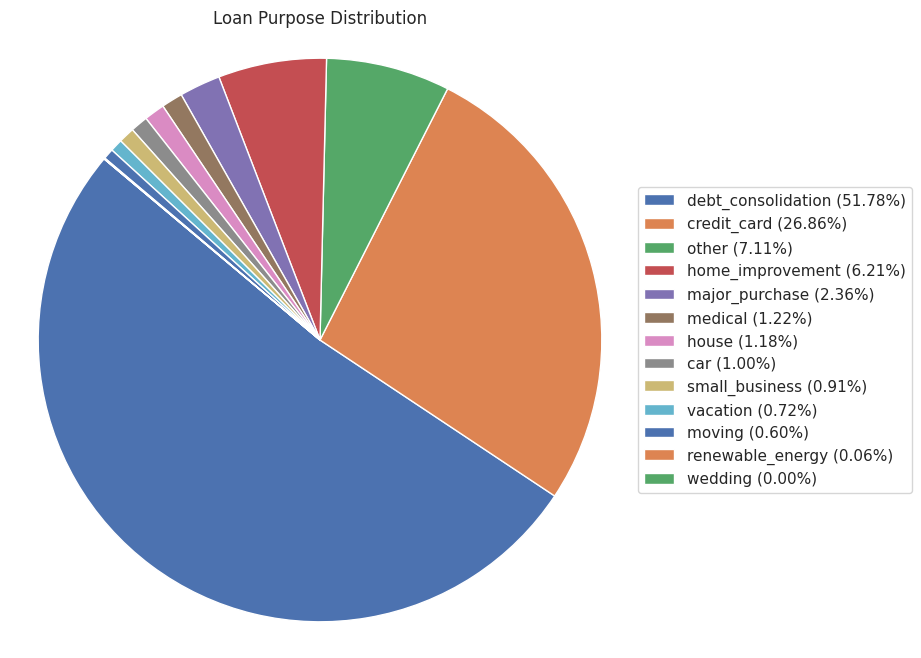

In [7]:
# Analysis of the distribution of loan purposes
import pandas as pd
import matplotlib.pyplot as plt

purpose_counts = loan_data['purpose'].value_counts(normalize=True) * 100  # Calculate percentages

labels = purpose_counts.index
percentages = purpose_counts.values

plt.figure(figsize=(8, 8))
plt.pie(percentages, startangle=140)
plt.axis('equal') 
plt.title('Loan Purpose Distribution')

# Create legend with labels and percentages
legend_labels = [f'{label} ({percentages[i]:.2f}%)' for i, label in enumerate(labels)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

As can be seen from the graph, the percentage of loans with the purpose of debt_consolidation is more than 50% and the percentage of loans with the purpose of credit_card is more than 25%. It is evident that most of the loans are taken to deal with their debt problems and credit card repayment.

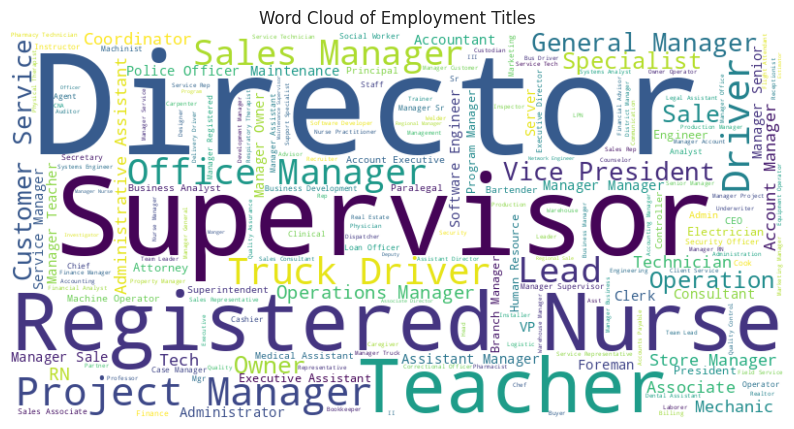

In [8]:
# Word cloud of job titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(loan_data['emp_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Employment Titles')
plt.axis('off')
plt.show()

According to the word cloud of occupational titles, the most frequent titles are Director, Supervisor and Registered Nurse, while Teacher and Project Manager are also very frequent.

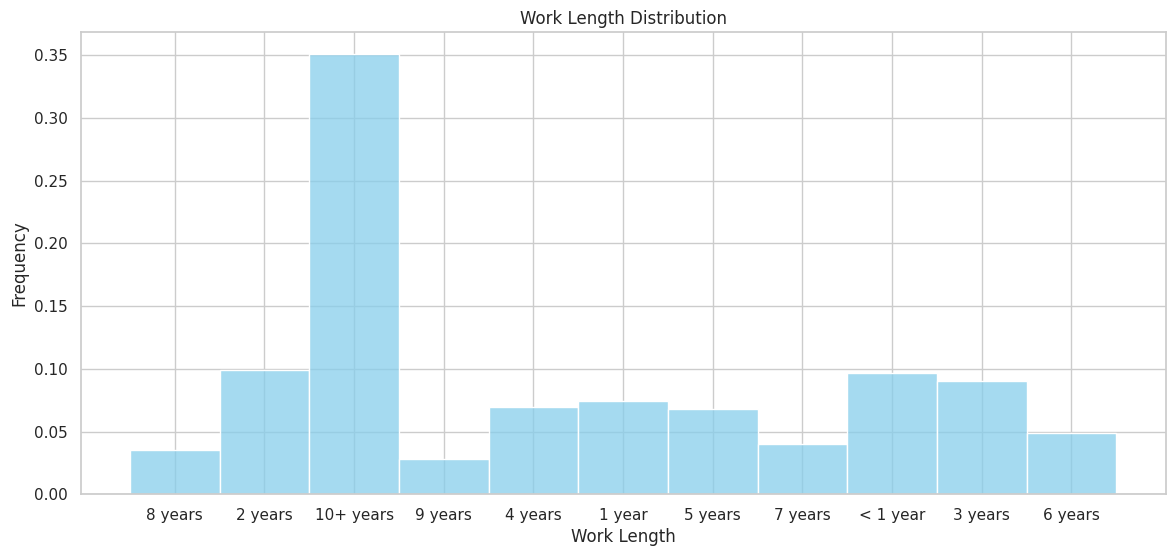

In [12]:
# Analysis of the distribution of work length
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

loan_data['emp_length'] = loan_data['emp_length'].replace('', np.nan)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.histplot(loan_data['emp_length'].dropna(), bins=30, color='skyblue',stat='density')
plt.title('Work Length Distribution')
plt.xlabel('Work Length')
plt.ylabel('Frequency')
plt.show()

According to the distribution chart of working hours, it can be seen that the number of people who have worked for more than 10 years reaches 35%. In addition, there is a large number of people who have worked for less than or equal to 3 years.

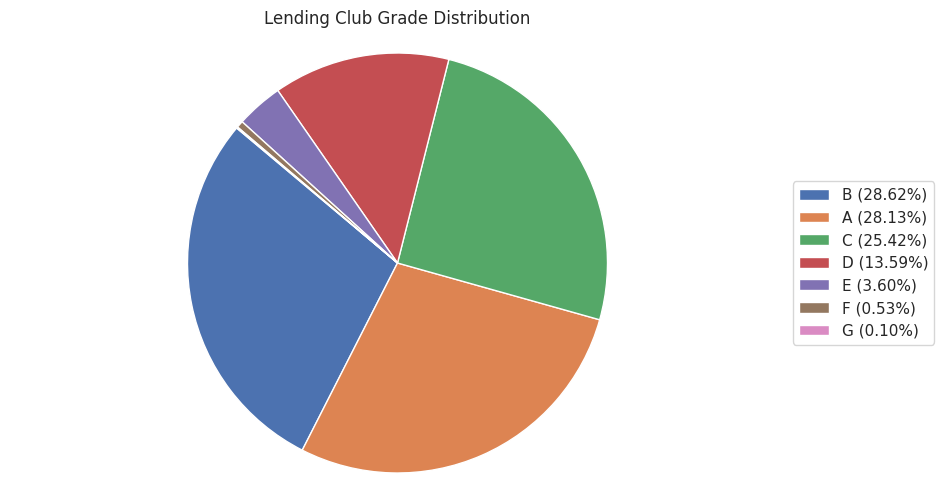

In [13]:
# Analysis of Lending Club grade
import pandas as pd
import matplotlib.pyplot as plt

grade_counts = loan_data['grade'].value_counts(normalize=True) * 100  # Calculate percentages

labels = grade_counts.index
percentages = grade_counts.values

plt.figure(figsize=(10, 6))
plt.pie(percentages, startangle=140)
plt.axis('equal') 
plt.title('Lending Club Grade Distribution')

# Create legend with labels and percentages
legend_labels = [f'{label} ({percentages[i]:.2f}%)' for i, label in enumerate(labels)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

It can be seen that those who received loans had high Lending Club ratings, with the percentage of people with grades of A,B,and C combined exceeding 80%. And only 0.1% of those who received loans had a G rating. This suggests that Lending Club ratings are an important indicator of whether an applicant can get a loan.

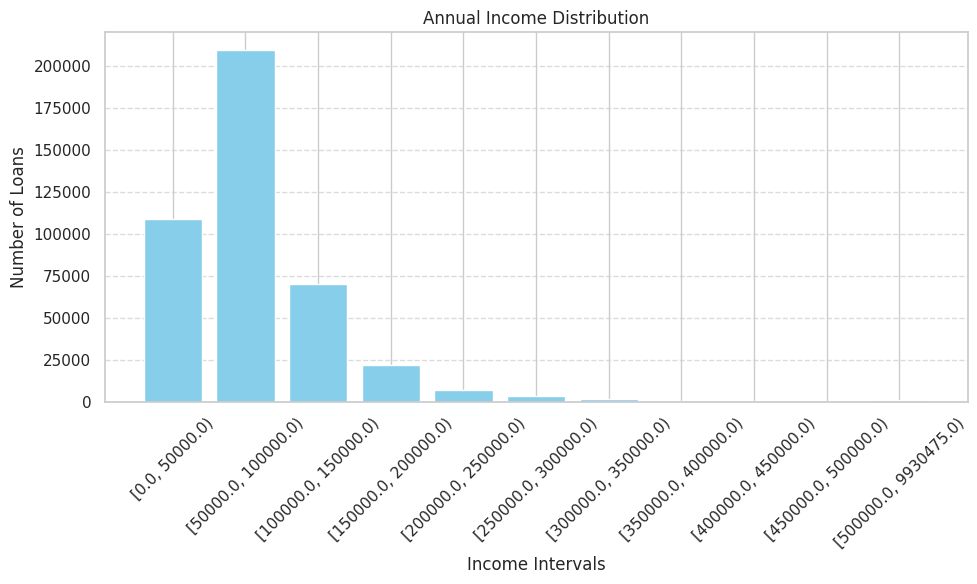

In [14]:
# Analysis of annual income
import pandas as pd
import matplotlib.pyplot as plt

max_income = loan_data['annual_inc'].max()

bins = list(range(0, 500001, 50000)) + [max_income]
income_intervals = pd.cut(loan_data['annual_inc'], bins=bins, right=False)
income_distribution = income_intervals.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(income_distribution)), income_distribution, color='skyblue')
plt.title('Annual Income Distribution')
plt.xlabel('Income Intervals')
plt.ylabel('Number of Loans')
plt.xticks(range(len(income_distribution)), income_distribution.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As it can be seen based on the annual income distribution graph, the majority of borrowers are concentrated in the income range of less than \$150,000. 

The largest number of them have incomes in the range of 50,000 to 100,000 doll.

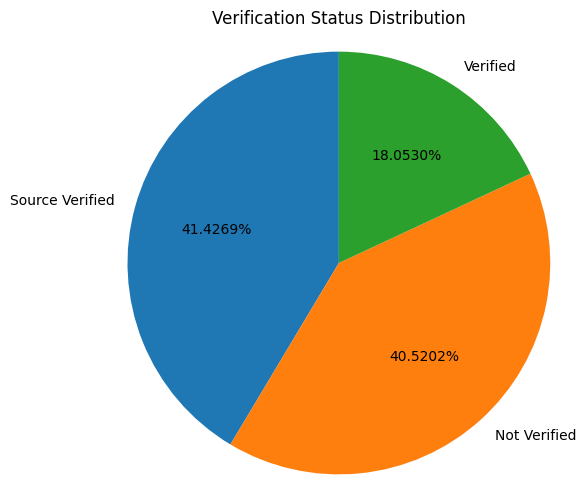

In [6]:
# Analysis of the distribution of verification status

import pandas as pd
import matplotlib.pyplot as plt

verified_counts = loan_data['verification_status'].value_counts()

labels = verified_counts.index
sizes = verified_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=90)
plt.axis('equal') 
plt.title('Verification Status Distribution')
plt.show()

As you can see, Source Verified and Verified together amount to almost 60%, meaning that more than half of the people who received loans had their information verified.

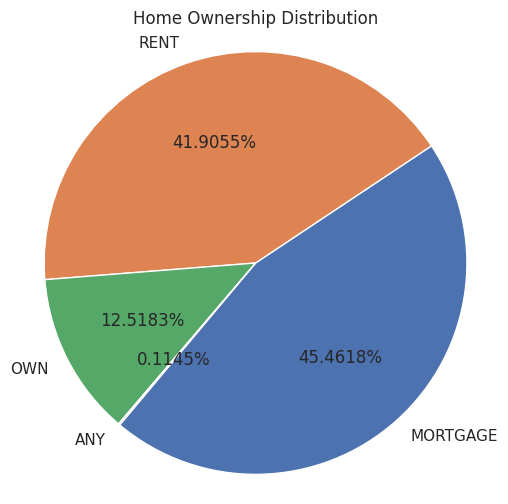

In [16]:
# Analysis of the distribution of home ownership

import pandas as pd
import matplotlib.pyplot as plt

home_counts = loan_data['home_ownership'].value_counts()

labels = home_counts.index
sizes = home_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=230)
plt.axis('equal') 
plt.title('Home Ownership Distribution')
plt.show()

It can be seen that not many people own their own homes, and most of them rent or take out mortgages, which also shows that their financial situation is not particularly good, which is why they need to apply for a loan.

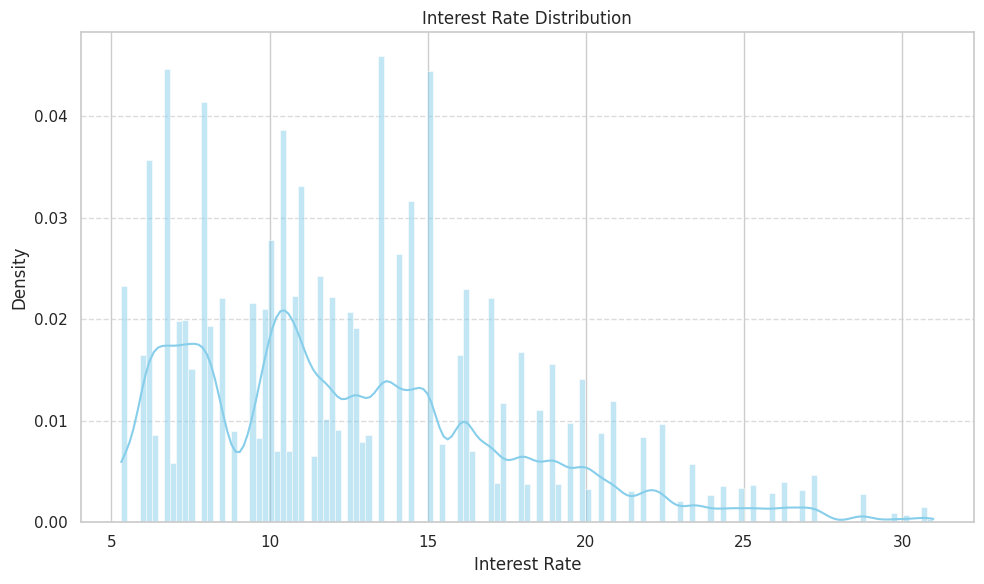

In [17]:
# Analysis of the distribution of interest rate
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['int_rate'], stat='probability', kde=True,  color='skyblue')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As can be seen, the interest rates are concentrated between 5% and 15%, with the highest rate exceeding 30%. The interest rates are relatively high.

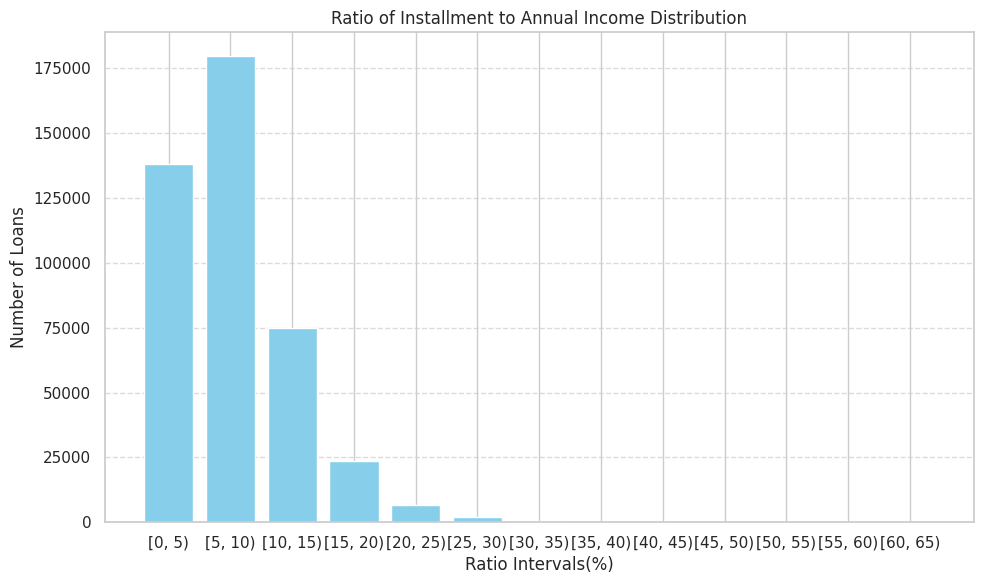

In [18]:
# Analysis of the proportional distribution of annual repayments and annual income
import pandas as pd
import matplotlib.pyplot as plt

loan_data['installment_annual_inc_ratio'] = loan_data['installment'] * 12 / loan_data['annual_inc']*100
max_ratio = loan_data['installment_annual_inc_ratio'].max()

bins = list(range(0, int(max_ratio)+5, 5)) 

ratio_intervals = pd.cut(loan_data['installment_annual_inc_ratio'], bins=bins, right=False)
ratio_distribution = ratio_intervals.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(ratio_distribution)), ratio_distribution, color='skyblue')
plt.title('Ratio of Installment to Annual Income Distribution')
plt.xlabel('Ratio Intervals(%)')
plt.ylabel('Number of Loans')
plt.xticks(range(len(ratio_distribution)), ratio_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The distribution of installments as a percentage of annual income shows that the installment to annual income ratio is concentrated at less than 15%, which indicates that borrowers are able to repay their debts.

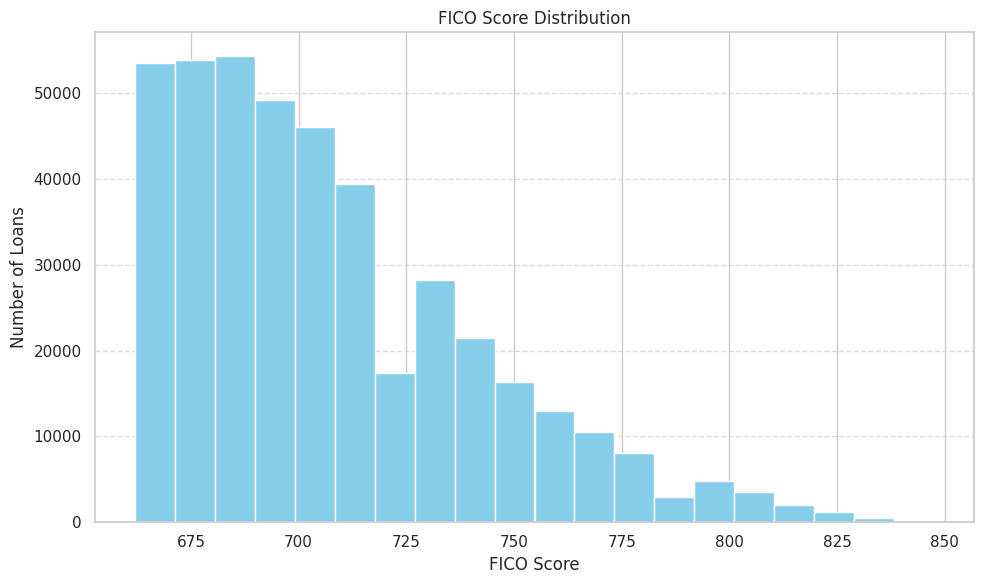

In [19]:
# Analysis of FICO Score Distribution
import pandas as pd
import matplotlib.pyplot as plt

loan_data['fico_mean'] = (loan_data['fico_range_high'] + loan_data['fico_range_low']) / 2

plt.figure(figsize=(10, 6))
plt.hist(loan_data['fico_mean'], bins=20, color='skyblue')
plt.title('FICO Score Distribution')
plt.xlabel('FICO Score')
plt.ylabel('Number of Loans')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It can be seen that the average FICO score of the borrowers is basically above 670, which means that their credit is relatively good.

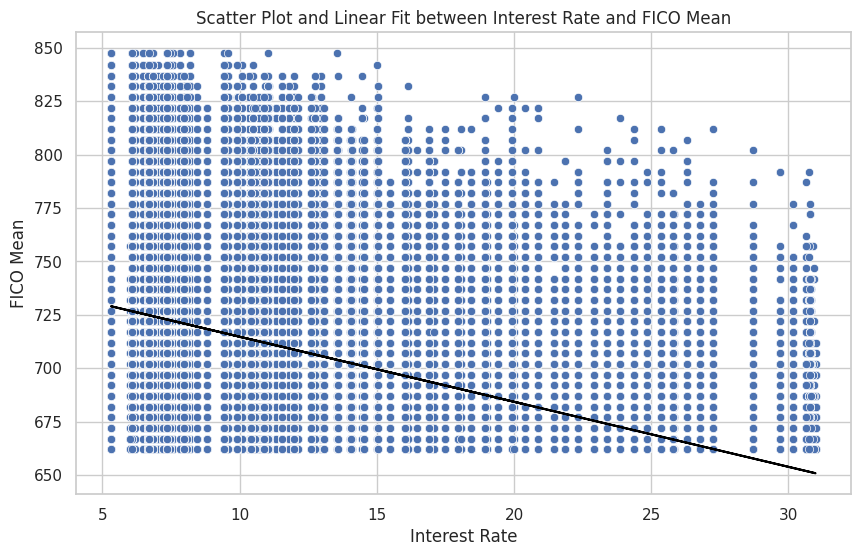

Correlation coefficient: -0.44217862279632997


In [21]:
# Analyzing the relationship between Interest Rate and FICO Mean
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='int_rate', y='fico_mean', data=loan_data)

# Fit a line
coefficients = np.polyfit(loan_data['int_rate'], loan_data['fico_mean'], 1)
poly = np.poly1d(coefficients)
x_values = np.array(loan_data['int_rate'])
plt.plot(x_values, poly(x_values), color='black')

# Set plot attributes
plt.xlabel('Interest Rate')
plt.ylabel('FICO Mean')
plt.title('Scatter Plot and Linear Fit between Interest Rate and FICO Mean')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_matrix = np.corrcoef(loan_data['int_rate'], loan_data['fico_mean'])
correlation = correlation_matrix[0, 1]
print("Correlation coefficient:", correlation)

As can be seen from the figure, the interest rate and the average FICO score are negatively correlated and have a coefficient of -0.442, indicating that the interest rate on the loan that borrowers receive is correlated with their FICO credit score.

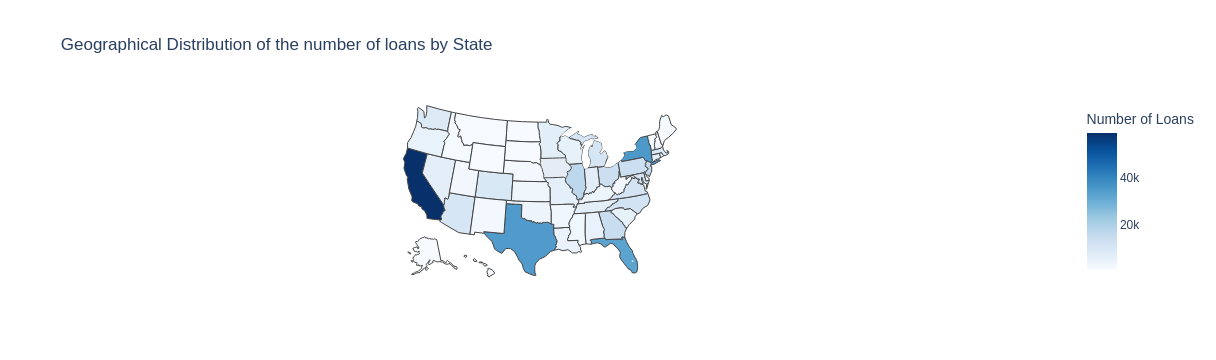

In [22]:
# Geographical distribution of the number of loans
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

state_counts = loan_data['addr_state'].value_counts()

fig = go.Figure(data = go.Choropleth(
    locations = state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title="Number of Loans",
    hoverinfo='location+z+text'
))
fig.update_layout(
    title='Geographical Distribution of the number of loans by State',
    geo_scope = 'usa',
)
fig.show()

It can be seen that California has the highest number of loans, plus Texas, Florida, and New York have a higher number of loans.

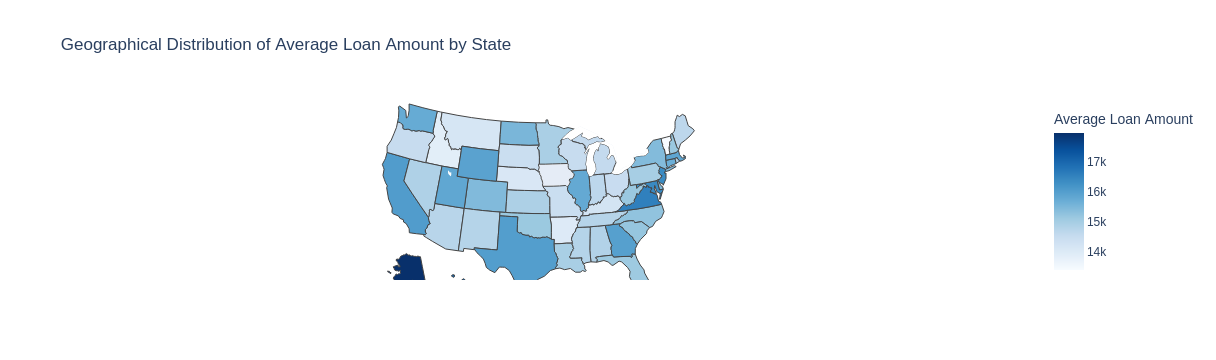

In [23]:
# Geographical distribution of average loan amount
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

# Calculate average loan amount by state
avg_loan_amount_by_state = loan_data.groupby('addr_state')['loan_amnt'].mean().reset_index()

# Merge average loan amount data with state counts
state_data = pd.merge(avg_loan_amount_by_state, state_counts, left_on='addr_state', right_index=True)

# Plot geographical distribution of average loan amount
fig = go.Figure(data=go.Choropleth(
    locations=state_data['addr_state'],
    z=state_data['loan_amnt'],
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='Average Loan Amount',
    hoverinfo='location+z',
))
fig.update_layout(
    title='Geographical Distribution of Average Loan Amount by State',
    geo_scope='usa'
)
fig.show()

It can be seen that the state of Alaska has the highest average loan amount. The average loan amount is also on the high side on the East and West coasts, which corresponds to the well-developed economies of these regions.

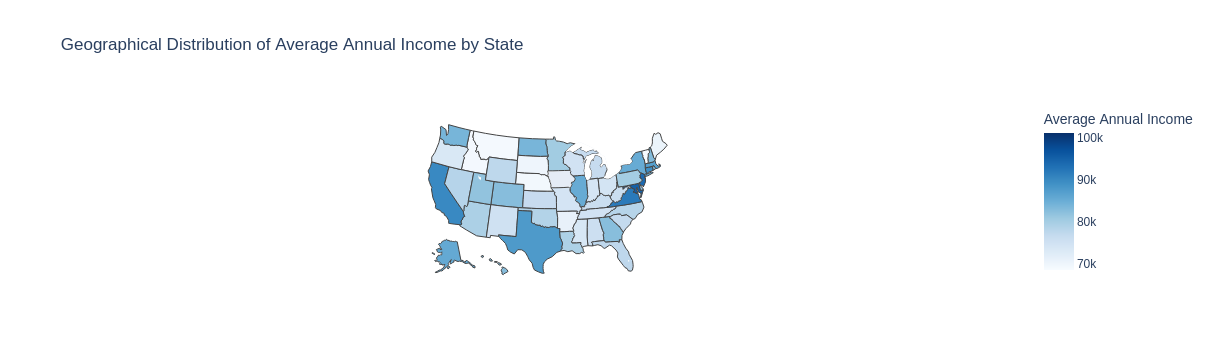

In [24]:
# Geographical distribution of average annual income
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

# Calculate average annual income by state
avg_income_by_state = loan_data.groupby('addr_state')['annual_inc'].mean().reset_index()

# Merge average income data with state counts
state_data = pd.merge(avg_income_by_state, state_counts, left_on='addr_state', right_index=True)

# Plot geographical distribution of average annual income
fig = go.Figure(data=go.Choropleth(
    locations=state_data['addr_state'],
    z=state_data['annual_inc'],
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='Average Annual Income',
    hoverinfo='location+z'
))
fig.update_layout(
    title='Geographical Distribution of Average Annual Income by State',
    geo_scope='usa'
)
fig.show()

The figure shows that borrowers on the East and West Coasts have higher average annual incomes, further validating the higher economic levels in these areas.

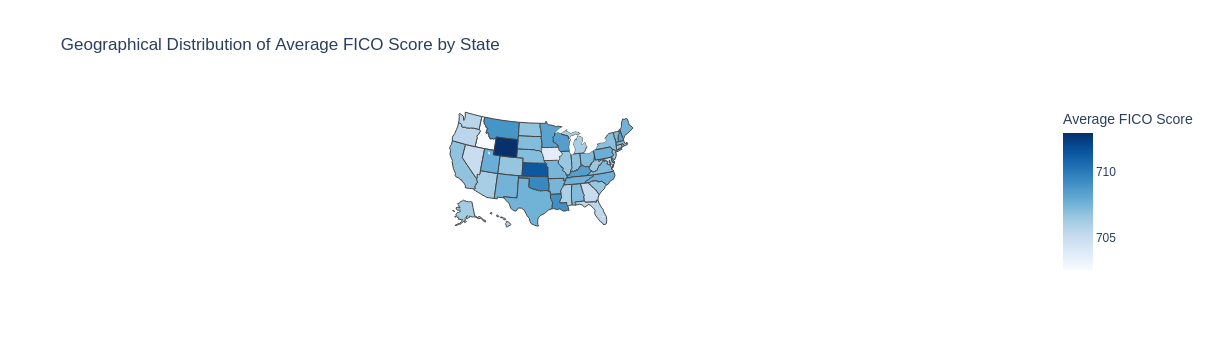

In [25]:
# Geographical distribution of average FICO score
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

# Calculate average FICO score by state
avg_fico_by_state = loan_data.groupby('addr_state')['fico_mean'].mean().reset_index()

# Merge average FICO score data with state counts
state_data = pd.merge(avg_fico_by_state, state_counts, left_on='addr_state', right_index=True)

# Plot geographical distribution of average FICO score
fig = go.Figure(data=go.Choropleth(
    locations=state_data['addr_state'],
    z=state_data['fico_mean'],
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='Average FICO Score',
    hoverinfo='location+z',
))
fig.update_layout(
    title='Geographical Distribution of Average FICO Score by State',
    geo_scope='usa'
)
fig.show()

As shown in the figure, borrowers in the central U.S. have higher average FICO scores, especially in Wyoming, at 712.9.

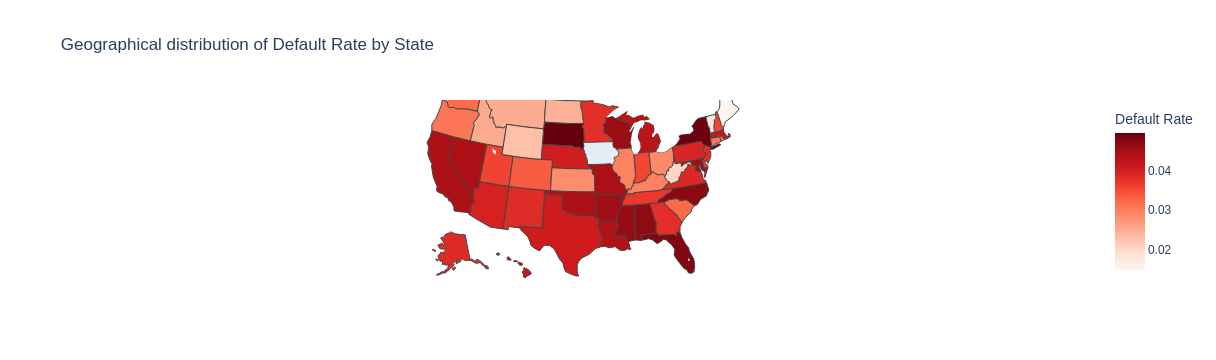

In [26]:
# Geographical distribution of Default Rate
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

# Define a function to categorize loan status
def categorize_status(status):
    if status in ['Current', 'Fully Paid']:
        return 'Non-Default'
    else:
        return 'Default'

# Apply the function to create a new column 'loan_category'
loan_data['loan_category'] = loan_data['loan_status'].apply(categorize_status)

# Group by state and loan category, and count the number of loans for each group
state_loan_counts = loan_data.groupby(['addr_state', 'loan_category']).size().unstack(fill_value=0)

# Calculate the default rate (Default / (Non-Default + Default)) for each state
state_loan_counts['Default Rate'] = state_loan_counts['Default'] / (state_loan_counts['Non-Default'] + state_loan_counts['Default'])

# Sort the states by default rate
state_loan_counts = state_loan_counts.sort_values(by='Default Rate', ascending=False)

# Plot the default rate for each state on a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_loan_counts.index,  # State codes
    z=state_loan_counts['Default Rate'],  # Default rate
    locationmode='USA-states',  # Use USA state codes
    colorscale='Reds',  # Color scale
    colorbar_title='Default Rate',  # Color bar title
    hovertext=state_loan_counts.index,  # Hover text
))

# Update layout
fig.update_layout(
    title_text='Geographical distribution of Default Rate by State',
    geo_scope='usa',  # Limit map scope to USA
)

# Show the map
fig.show()

As shown in the graph, loan default rates are higher on the east and west coasts of the U.S. and also in states in the southern U.S., but the highest default rate is in South Dakota.

In [38]:
# Constructing a default prediction model based on load_status
# Data preprocessing

# Current status does not indicate whether the borrower will default in the future and needs to be removed
data_processed = loan_data[(loan_data['loan_status'] != 'Current')]
data_processed['label'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Preserve numerical and nominal features
# Remove 'installment', because 'installment_annual_inc_ratio' contains information about it
selected_columns=['addr_state','annual_inc','emp_length','grade','home_ownership','int_rate','loan_amnt','term','verification_status','fico_mean','installment_annual_inc_ratio','label']
data_processed = data_processed[selected_columns]
data_processed.dropna(how='any',inplace=True)

In [39]:
# Processing nominal features
# 1. Numerical encoding for the 'addr_state' column
data_processed['addr_state'] = data_processed['addr_state'].astype('category').cat.codes

# 2. Numerical encoding for the 'emp_length' column
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
data_processed['emp_length'] = data_processed['emp_length'].replace(emp_length_mapping)

# 3. Numerical encoding for the 'grade' column
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}
data_processed['grade'] = data_processed['grade'].replace(grade_mapping)

# 4. Keep only 'RENT', 'OWN', 'MORTGAGE' categories for 'home_ownership', and use numerical encoding
data_processed = data_processed[data_processed['home_ownership'].isin(['RENT', 'OWN', 'MORTGAGE'])]
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2}
data_processed['home_ownership'] = data_processed['home_ownership'].replace(home_ownership_mapping)

# 5. Numerical encoding for the 'term' column
term_mapping = {' 36 months': 0, ' 60 months': 1}
data_processed['term'] = data_processed['term'].replace(term_mapping)

# 6. Numerical encoding for the 'verification_status' column
verification_status_mapping = {'Verified': 1, 'Source Verified': 0, 'Not Verified': -1}
data_processed['verification_status'] = data_processed['verification_status'].replace(verification_status_mapping)

In [40]:
data_processed.head(5)

addr_state  annual_inc  emp_length  grade  home_ownership  int_rate  \
3           46     52000.0           9      1               0      7.34   
13          10     55000.0          10      2               1     11.98   
20          42     40000.0           0      2               2     11.98   
21          33     55000.0           0      4               0     17.47   
34           9     57000.0          10      4               1     21.85   

    loan_amnt  term  verification_status  fico_mean  \
3      3000.0     0                    0      762.0   
13     5000.0     0                   -1      677.0   
20     7000.0     0                    1      697.0   
21    20300.0     1                    1      707.0   
34    30000.0     0                    1      682.0   

    installment_annual_inc_ratio  label  
3                       2.148462      1  
13                      3.622473      1  
20                      6.973200      1  
21                     11.119855      0  
34                     24.071368      1

In [30]:
num_rows = data_processed.shape[0]
print("data_processed's row is:", num_rows)

data_processed's row is: 54308


In [41]:
# Normalized
from sklearn.preprocessing import StandardScaler

features_to_normalize = ['addr_state', 'annual_inc', 'emp_length', 'grade', 'home_ownership', 'int_rate',
'loan_amnt', 'term', 'verification_status', 'fico_mean', 'installment_annual_inc_ratio']

# Convert column names to string
data_processed.columns = data_processed.columns.map(str)

scaler = StandardScaler()

data_processed[features_to_normalize] = scaler.fit_transform(data_processed[features_to_normalize])
# data_processed = scaler.fit_transform(data_processed)

In [33]:
data_processed.head(5)

addr_state  annual_inc  emp_length     grade  home_ownership  int_rate  \
3     1.613692   -0.407704    0.845573 -1.333691       -1.149563 -1.151128   
13   -0.824051   -0.370982    1.114583 -0.524949       -0.075952 -0.307114   
20    1.342831   -0.554591   -1.575518 -0.524949        0.997658 -0.307114   
21    0.733396   -0.370982   -1.575518  1.092534       -1.149563  0.691514   
34   -0.891766   -0.346501    1.114583  1.092534       -0.075952  1.488234   

    loan_amnt      term  verification_status  fico_mean  \
3   -1.197506 -0.612962             0.191516   1.497581   
13  -1.000526 -0.612962            -1.165411  -0.838165   
20  -0.803546 -0.612962             1.548443  -0.288577   
21   0.506368  1.631423             1.548443  -0.013784   
34   1.461720 -0.612962             1.548443  -0.700768   

    installment_annual_inc_ratio  label  
3                      -1.066340      1  
13                     -0.771667      1  
20                     -0.101816      1  
21                      0.727151      0  
34                      3.316317      1

Accuracy: 0.7168109003866692
F1 Score: 0.8237653259997708
AUC: 0.7084044222322886


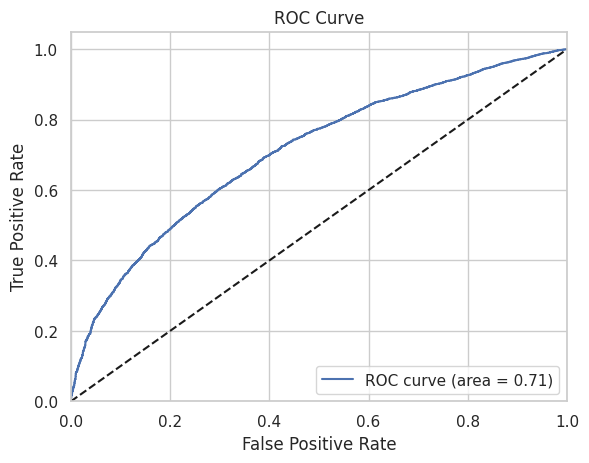

In [34]:
# A Model based on Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = data_processed.drop(columns=['label']) 
y = data_processed['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.712944209169582
F1 Score: 0.8196436834798704
AUC: 0.6984393040095952


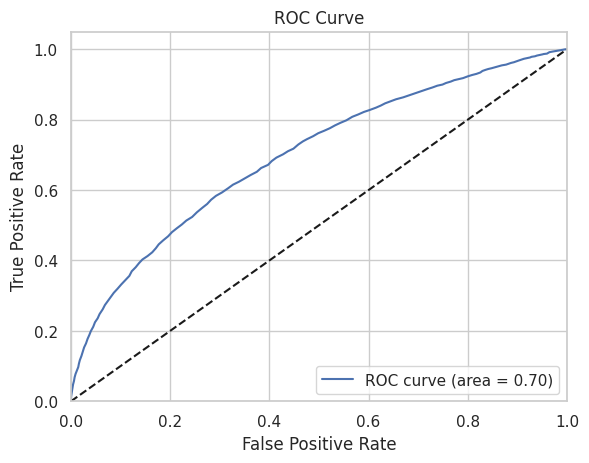

In [35]:
# A Model based on Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200,class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 31098, number of negative: 12348
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 43446, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy: 0.6480390351684773
F1 Score: 0.719289228284015
AUC: 0.7138705403976164


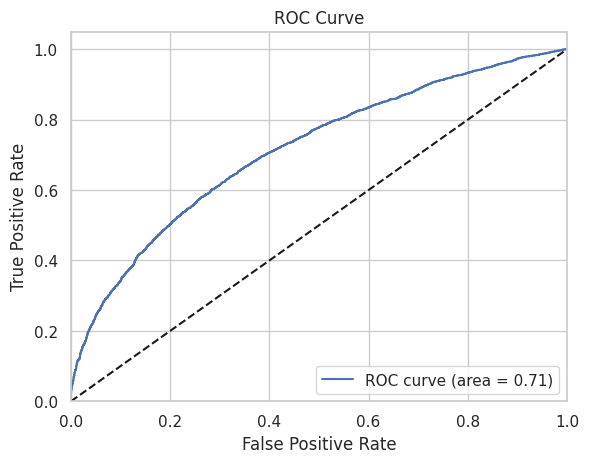

In [42]:
# A Model based on Light-GBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(num_leaves=50,max_depth=10,
learning_rate=0.1,subsample=0.8,class_weight='balanced',random_state=42)

lgb_model.fit(X_train, y_train)

lgb_y_pred = lgb_model.predict(X_test)


accuracy = accuracy_score(y_test, lgb_y_pred)
f1 = f1_score(y_test, lgb_y_pred)

fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()